Import utils from helper, for extracting metrics from financial document

In [1]:
from utils_metric_extraction import *

improt all the utility functions for analysis of document 

In [2]:
from utils_analysis import *

the below cell reads the pdf and extracts all the data points we are required to extract in part A, segmentation is period wise

In [5]:

import os
current_dir = os.getcwd()
pth=os.path.join(current_dir,"Sample.pdf")
pdf_path=pth


text = clean_text(extract_text_from_pdf(pdf_path))
chunks = chunk_text(text)

metrics = extract_financial_metrics(chunks)

print("Extracted metrics:")
for m in metrics:
    print(m)

metrics = extract_financial_metrics(chunks)

merged_metrics_list = merge_metrics_by_all_periods(metrics)

metrics_dict_list = [m.model_dump() for m in merged_metrics_list]
df = calculate_ratios(metrics_dict_list)

df_values = pd.DataFrame([vars(m) for m in merged_metrics_list])


c:\Users\NHA\Desktop\Financial-agent\utils_analysis.py:146: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  return LLMChain(llm=llm, prompt=prompt)
c:\Users\NHA\Desktop\Financial-agent\utils_analysis.py:169: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = chain.run(text=chunk.page_content)


Extracted metrics:
period=None revenue_total='$9,625' revenue_growth=None revenue_by_segment='Service revenue $2,750, Sales revenue $6,875' gross_profit='$2,750' gross_margin=None ebit='$1,390' ebit_margin=None net_profit='$945' net_margin=None ebitda=None adjusted_ebitda=None cogs='4,125' opex='1,360' interest='40' depreciation_amortization='100' cash_flow_operating=None cash_flow_investing=None cash_flow_financing=None free_cash_flow=None cash_burn_rate=None runway=None total_assets=None total_liabilities=None cash_equivalents=None debt=None working_capital=None net_worth=None valuation=None capital_raised=None cap_table=None
period=None revenue_total=None revenue_growth=None revenue_by_segment=None gross_profit=None gross_margin=None ebit='1,390' ebit_margin=None net_profit='945' net_margin=None ebitda=None adjusted_ebitda=None cogs=None opex='1,360' interest='40' depreciation_amortization='1,300' cash_flow_operating=None cash_flow_investing=None cash_flow_financing=None free_cash_f

In [8]:
df_values

,period,revenue_total,revenue_growth,revenue_by_segment,gross_profit,gross_margin,ebit,ebit_margin,net_profit,net_margin,...,runway,total_assets,total_liabilities,cash_equivalents,debt,working_capital,net_worth,valuation,capital_raised,cap_table
0,None,"$9,625",None,"Service revenue $2,750, Sales revenue $6,875","$2,750",None,"$1,390",None,$945,None,...,None,"13,060","8,895","1,550","8,000","1,465","4,165",None,None,None


In [9]:
df

,Period,Current Ratio,Debt to Equity,Gross Margin,Operating Margin,Net Margin,Return on Equity (ROE),Return on Assets (ROA),Burn Multiple
0,None,1.47,1.92,0.57,0.14,0.1,0.23,0.07,NaN


the below code cells, does all the analysis described in part B of the project using the extracted data and text from the pdf

<class 'list'>
[FinancialMetrics(period=None, revenue_total='$9,625', revenue_growth=None, revenue_by_segment='Service revenue $2,750, Sales revenue $6,875', gross_profit='$2,750', gross_margin=None, ebit='$1,390', ebit_margin=None, net_profit='$945', net_margin=None, ebitda=None, adjusted_ebitda=None, cogs='4,125', opex='1,360', interest='40', depreciation_amortization='100', cash_flow_operating=None, cash_flow_investing=None, cash_flow_financing=None, free_cash_flow=None, cash_burn_rate=None, runway=None, total_assets=None, total_liabilities=None, cash_equivalents=None, debt=None, working_capital=None, net_worth=None, valuation=None, capital_raised=None, cap_table=None), FinancialMetrics(period=None, revenue_total=None, revenue_growth=None, revenue_by_segment=None, gross_profit=None, gross_margin=None, ebit='1,390', ebit_margin=None, net_profit='945', net_margin=None, ebitda=None, adjusted_ebitda=None, cogs=None, opex='1,360', interest='40', depreciation_amortization='1,300', cash_fl

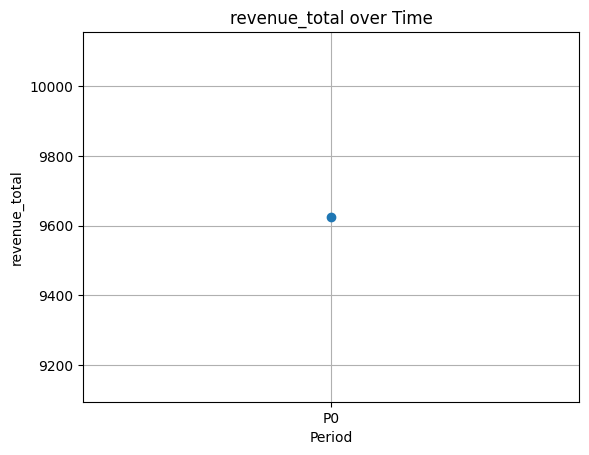

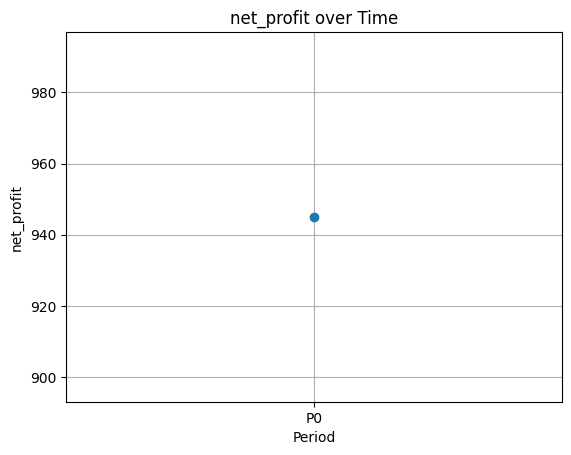

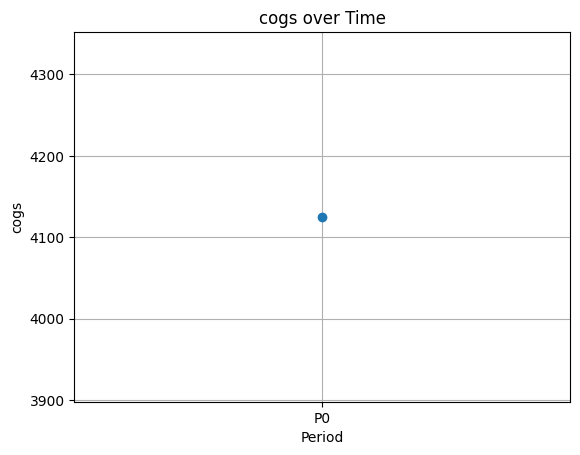

0.1444155844155844
[{'period': None, 'flags': []}]
[(None, 'Insufficient data')]
[(None, 'Insufficient data')]
[(None, 'Net margin: 9.82%')]
[(None, 'Sales-to-Marketing ratio: 7.08')]
[(None, 'Debt manageable')]
945.0
inf
[(None, 'Green: Profitable, cash positive')]
Okay, I have analyzed the provided financial data for the single period. Since there's only one period, I cannot perform trend analysis or calculate growth rates. However, I can provide a snapshot assessment and investment readiness score based on the available information.

**Analysis:**

*   **Revenue:** Total revenue is $9,625, split between Service ($2,750) and Sales ($6,875).
*   **Profitability:**
    *   Gross Profit is $2,750.
    *   EBIT (Operating Profit) is $1,390.
    *   Net Profit is $945.
    *   COGS is $4,125
    *   OPEX is $1,360
*   **Margins:**  Since the data does not provide gross margin or net margin, I will calculate them:
    *   Gross Margin = (Gross Profit / Total Revenue) = $2,750 / $9,625 = 28

In [6]:
pdf=pth

text = clean_text(extract_text_from_pdf(pdf))
chunks = chunk_text(text)

print(type(chunks))

data = extract_financial_metrics(chunks)  

print(data)

metrices = merge_metrics_by_all_periods(data)
    

plot_trend(metrices, "revenue_total")
plot_trend(metrices, "net_profit")
plot_trend(metrices, "cogs")

print(benchmark_ratios_all(metrices))


# Usage
print(evaluate_cash_flow_all(metrices))
print(calculate_runway_all(metrices))


print(profitability_analysis_all(metrices))
print(efficiency_ratio_all(metrices))


print(evaluate_debt_risk_all(metrices))

print(investment_readiness_all(metrices))

print(interpret_with_gemini(metrices))